In [7]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r"C:\Users\ZAK\Downloads\movies.csv")

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
# A glimpse into any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [13]:
# We have no clear way of acquiring any of this missing data and will lose a handful of it by getting rid of the few rows that contain nulls; this will not have much impact on the analysis ahead. 

df = df.dropna()

In [17]:
# Now, we can confirm that all nulls have been dropped from the dataframe. The non-null count for all columns is similar. 

df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [19]:
# Changing data types of the votes, gross and budget columns could enhance the figures and get rid of the decimal points (floats)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [21]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [41]:
# Next, we have the release date and year columns and we need to make sure that the years in both columns are the same. Lets create a 'correct' year column 

df['correct_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [43]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [45]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [68]:
# lets change the number of maximum rows displayed as well

pd.set_option('display.max_rows', 1000)

In [80]:
# sorting the df by a descending gross

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [72]:
# Getting rid/ dropping any duplicates 

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [76]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


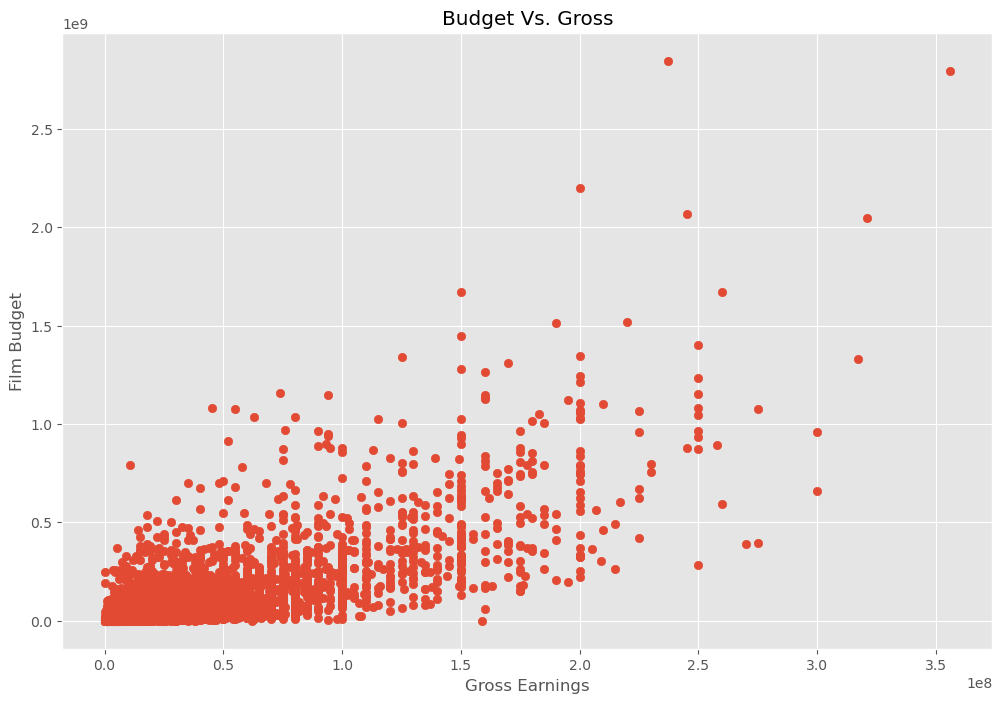

In [84]:
# A scatter plot of budget versus gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget Vs. Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

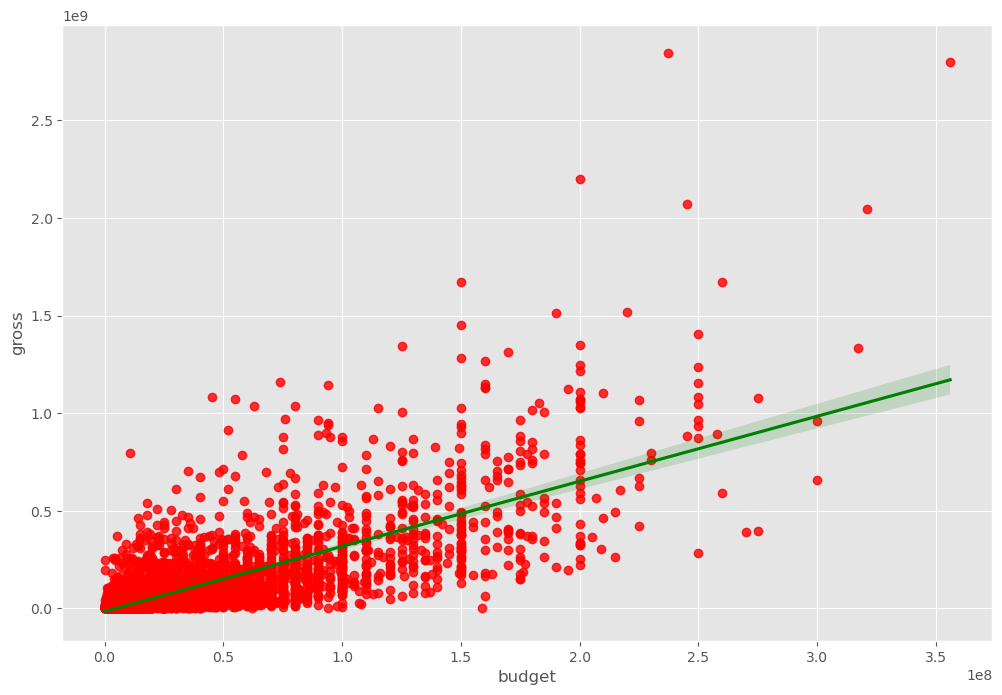

In [90]:
# to actually determine whether or notthe columns actually are correlated, we use a reg plot using seaborn. 

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "green"})

In [98]:
# lets look deeper into the correlation (we can use pearson, kendall or spearman; we stick to the default, pearson)

df.select_dtypes(include = [np.number]).corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


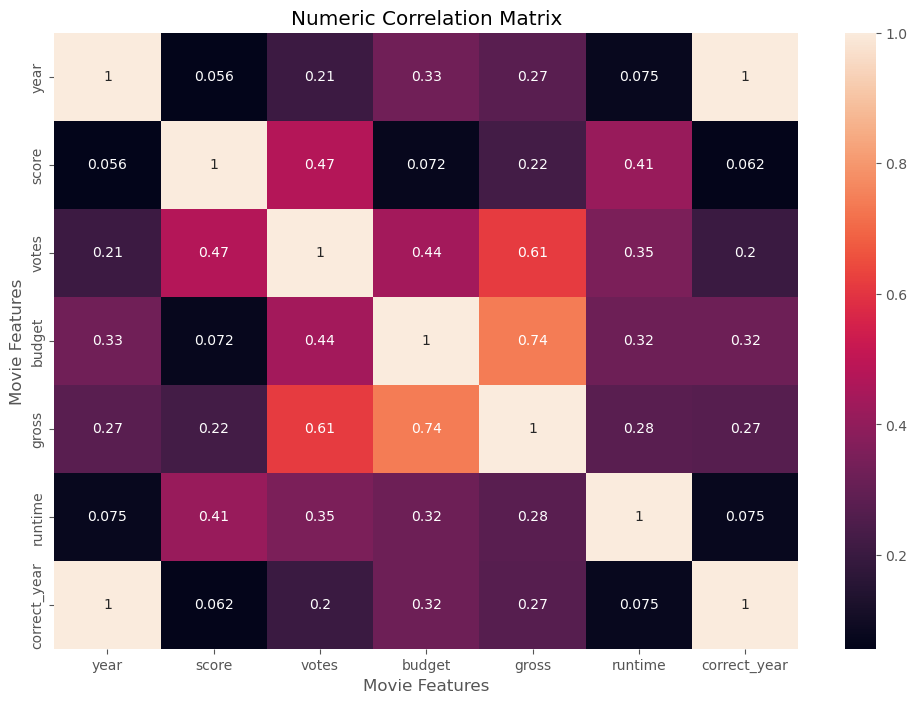

In [104]:
# with the colors of the heatmap, you can easily identify the high and low correlations. 

corr_matrix = df.select_dtypes(include = [np.number]).corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)
plt.title('Numeric Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [106]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [ ]:
# if we want to include 'company' and other non_numeric columns in our corr and give every one a number then visulaise it, we can. this could help us discover any other correlations in the data. 


# df_numerized = df

# for col_name in df_numerized.columns:
#    if(df_numerized[col_name].dtype == 'object'):
 #       df_numerized[col_name].astype('category')
  #      df_numerized[col_name].cat.codes
# df_numerized 


In [108]:
# lets create pairs for which we can easily see the correkation of one col and another

corr_mat = df.select_dtypes(include = np.number).corr()
corr_pairs = corr_mat.unstack()
corr_pairs

year          year            1.000000
              score           0.056386
              votes           0.206021
              budget          0.327722
              gross           0.274321
              runtime         0.075077
              correct_year    0.998726
score         year            0.056386
              score           1.000000
              votes           0.474256
              budget          0.072001
              gross           0.222556
              runtime         0.414068
              correct_year    0.061923
votes         year            0.206021
              score           0.474256
              votes           1.000000
              budget          0.439675
              gross           0.614751
              runtime         0.352303
              correct_year    0.203098
budget        year            0.327722
              score           0.072001
              votes           0.439675
              budget          1.000000
              gross      

In [112]:
# we can have these pairs sorted to simplifiy the identification of which columns are more highly correlated than others. 

sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

year          year            1.000000
score         score           1.000000
runtime       runtime         1.000000
gross         gross           1.000000
votes         votes           1.000000
budget        budget          1.000000
correct_year  correct_year    1.000000
              year            0.998726
year          correct_year    0.998726
budget        gross           0.740247
gross         budget          0.740247
votes         gross           0.614751
gross         votes           0.614751
score         votes           0.474256
votes         score           0.474256
              budget          0.439675
budget        votes           0.439675
score         runtime         0.414068
runtime       score           0.414068
              votes           0.352303
votes         runtime         0.352303
year          budget          0.327722
budget        year            0.327722
correct_year  budget          0.320312
budget        correct_year    0.320312
              runtime    